#Solutions to Underfitting and Overfitting: A Comprehensive Overview

Before we dive into the code, let's outline the major strategies we will explore in this module to address underfitting and overfitting. Understanding these solutions conceptually will provide a roadmap for our practical exercises.

1. Solutions for Underfitting (Model is Too Simple):

* Increase Model Complexity
* Feature Engineering
* Reduce Regularization

2. Solutions for Overfitting (Model is Too Complex):

* Decrease Model Complexity
* Regularization Techniques
* Increase Training Data
* Feature Selection / Feature Reduction
* Cross-Validation
* Ensemble Methods

In [3]:
# Import the kagglehub library.
# This library helps us download datasets from Kaggle.
import kagglehub

# Log in to Kaggle using kagglehub.login().
# This is necessary to access datasets that might be private or require Kaggle authentication.
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [4]:
# Use kagglehub.dataset_download() to download the 'home-data-for-ml-course' dataset from Kaggle user 'dansbecker'.
# This dataset contains house price data for the Iowa regression task.
dansbecker_home_data_for_ml_course_path = kagglehub.dataset_download('dansbecker/home-data-for-ml-course')

# Print a confirmation message to indicate that the data download is complete.
print('Data source import complete.')

100%|██████████| 94.0k/94.0k [00:00<00:00, 797kB/s]

Extracting files...
Data source import complete.


In [5]:
# Import pandas for data manipulation and analysis, especially for working with DataFrames.
import pandas as pd

# Import DecisionTreeRegressor and DecisionTreeClassifier for Decision Tree models for regression and classification.
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Import LinearRegression and LogisticRegression for linear models for regression and classification.
from sklearn.linear_model import LinearRegression, LogisticRegression

# Import StandardScaler and MinMaxScaler for data normalization and scaling.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import train_test_split for splitting datasets into training and validation sets.
from sklearn.model_selection import train_test_split

# Import mean_absolute_error for evaluating regression models.
from sklearn.metrics import mean_absolute_error

# Import accuracy_score, classification_report, confusion_matrix, roc_curve, and auc for evaluating classification models.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Import numpy for numerical operations, especially for working with arrays.
import numpy as np

# Import matplotlib.pyplot for basic plotting and creating visualizations.
import matplotlib.pyplot as plt

# Import seaborn for enhanced and more visually appealing statistical visualizations, like heatmaps for confusion matrices.
import seaborn as sns # For enhanced visualizations

In [6]:
# Construct the full file path to the 'train.csv' file, which is located within the downloaded dataset directory.
iowa_file_path = dansbecker_home_data_for_ml_course_path + '/train.csv'

# Use pandas pd.read_csv() function to read the data from the CSV file into a pandas DataFrame.
# The DataFrame 'iowa_data' will hold our dataset.
iowa_data = pd.read_csv(iowa_file_path)

# Print a success message to confirm that the Iowa dataset has been loaded.
print("Iowa dataset loaded successfully!")

# Display the first 5 rows of the DataFrame using iowa_data.head() to get a glimpse of the data.
print("\nFirst 5 rows of the Iowa dataset:")
print(iowa_data.head())
print(iowa_data.info())
print(iowa_data.describe())
print(iowa_data.columns)

Iowa dataset loaded successfully!

First 5 rows of the Iowa dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   


# Step 1: Prepare Data for Regression Task (House Price Prediction)

1. Selecting Target Variable: Identifying the column we want to predict (SalePrice).
2. Selecting Features: Choosing the columns we will use to make predictions. For simplicity in this module, we will focus on numeric features only.
3. Splitting Data: Dividing the data into training and validation sets to properly evaluate our models.

In [9]:
# Print a header to indicate the start of Step 1: Prepare Data for Regression.
print("\n\n----- Step 1: Prepare Data for Regression -----")

# 1.1 Select the target variable for regression, which is 'SalePrice' from the iowa_data DataFrame.
# We want to predict the sale price of houses, so this is our target variable (y_regression).
y_regression = iowa_data['SalePrice']

# Print a message to confirm the creation of the target variable.
print("Regression Target variable 'y_regression' created!")

# Display the first 5 values of the target variable using y_regression.head().
print("\nFirst 5 values of the target variable 'y_regression':")
print(y_regression.head())
print(y_regression.info())
print(y_regression.describe())

# 1.2 Select numeric features for the regression task.
# We are choosing to use only numeric columns from the iowa_data DataFrame as features (X_regression).
numeric_features_regression = iowa_data.select_dtypes(include=np.number)

# Drop the 'SalePrice' column from the numeric features, as it is our target variable, not a feature.
# We want to use other numeric features to predict 'SalePrice'.
X_regression = numeric_features_regression.drop('SalePrice', axis=1)

# Print a message to confirm the creation of the feature matrix.
print("\nPredictive features 'X_regression' created!")

# Display the first 5 rows of the feature matrix using X_regression.head().
print("\nFirst 5 rows of regression features 'X_regression':")
print(X_regression.head())
print(X_regression.info())
print(X_regression.columns)

# 1.3 Split the data into training and validation sets for the regression task.
# We use train_test_split to split X_regression and y_regression into training and validation sets.
# test_size=0.2 means 20% of the data will be used for validation, and 80% for training.
# random_state=0 ensures that the split is reproducible.
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=0)

# Print a message to confirm that the regression data has been split into training and validation sets.
print("\nRegression data split into training and validation sets.")

print("Shape of X_train_reg:", X_train_reg.shape)
print("Shape of X_val_reg:", X_val_reg.shape)
print("Shape of y_train_reg:", y_train_reg.shape)
print("Shape of y_val_reg:", y_val_reg.shape)



----- Step 1: Prepare Data for Regression -----
Regression Target variable 'y_regression' created!

First 5 values of the target variable 'y_regression':
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Predictive features 'X_regression' created!

First 5 rows of regression features 'X_regression':
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       197

In [10]:
# Print a header to indicate the start of Step 2: Regression Models - Training and Evaluation.
print("\n\n----- Step 2: Regression Models - Training and Evaluation -----")

# Define a dictionary 'regression_models' to store different regression models we want to evaluate.
# Each key is a descriptive name for the model, and each value is the model object itself.
regression_models = {
    "Decision Tree (max_depth=3) - Underfitting": DecisionTreeRegressor(max_depth=3, random_state=0), # Decision Tree with max_depth=3 (simple model, likely to underfit)
    "Decision Tree (No Limit) - Overfitting": DecisionTreeRegressor(random_state=0), # Decision Tree with no depth limit (complex model, likely to overfit)
    "Decision Tree (Regularized) - max_depth=10": DecisionTreeRegressor(max_depth=10, random_state=0), # Decision Tree with max_depth=10 (regularized model)
    "Linear Regression": LinearRegression() # Linear Regression model (simple model, might underfit)
}

# Initialize an empty dictionary 'regression_results' to store the Mean Absolute Error (MAE) for each model.
regression_results = {}

# Import SimpleImputer from sklearn.impute to handle missing values in the dataset.
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the strategy='mean' to fill missing values with the mean of each column.
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training features (X_train_reg) and transform both training and validation features.
# fit_transform() learns the mean from the training data and applies imputation to the training data.
X_train_reg_imputed = imputer.fit_transform(X_train_reg)
# transform() applies the imputation learned from the training data to the validation data.
X_val_reg_imputed = imputer.transform(X_val_reg) # use transform on validation to avoid data leakage

# Loop through each model in the 'regression_models' dictionary.
for name, model in regression_models.items():
    # Train the current regression model using the imputed training features (X_train_reg_imputed) and training target (y_train_reg).
    model.fit(X_train_reg_imputed, y_train_reg) # Use imputed training data

    # Make predictions on the imputed validation features (X_val_reg_imputed) using the trained model.
    predictions = model.predict(X_val_reg_imputed) # Use imputed validation data

    # Calculate the Mean Absolute Error (MAE) by comparing the predicted values to the actual validation target values (y_val_reg).
    mae = mean_absolute_error(y_val_reg, predictions)

    # Store the calculated MAE in the 'regression_results' dictionary with the model name as the key.
    regression_results[name] = mae

    # Print the model name and its corresponding MAE value.
    print(f"Model: {name}, MAE: {mae:.2f}")

# Print a header to display the regression results in a table format.
print("\n--- Regression Model Performance (MAE) ---")

# Create a pandas DataFrame from the 'regression_results' dictionary to display the results in a table.
# The DataFrame will have model names as index and 'Validation MAE' as column name.
df_regression_results = pd.DataFrame.from_dict(regression_results, orient='index', columns=['Validation MAE'])

# Print the DataFrame containing the regression results table.
print(df_regression_results)



----- Step 2: Regression Models - Training and Evaluation -----
Model: Decision Tree (max_depth=3) - Underfitting, MAE: 29727.59
Model: Decision Tree (No Limit) - Overfitting, MAE: 25800.93
Model: Decision Tree (Regularized) - max_depth=10, MAE: 26303.22
Model: Linear Regression, MAE: 23966.14

--- Regression Model Performance (MAE) ---
                                            Validation MAE
Decision Tree (max_depth=3) - Underfitting    29727.593444
Decision Tree (No Limit) - Overfitting        25800.928082
Decision Tree (Regularized) - max_depth=10    26303.220010
Linear Regression                             23966.142504




----- Step 3: Visualize Regression Model Predictions -----


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


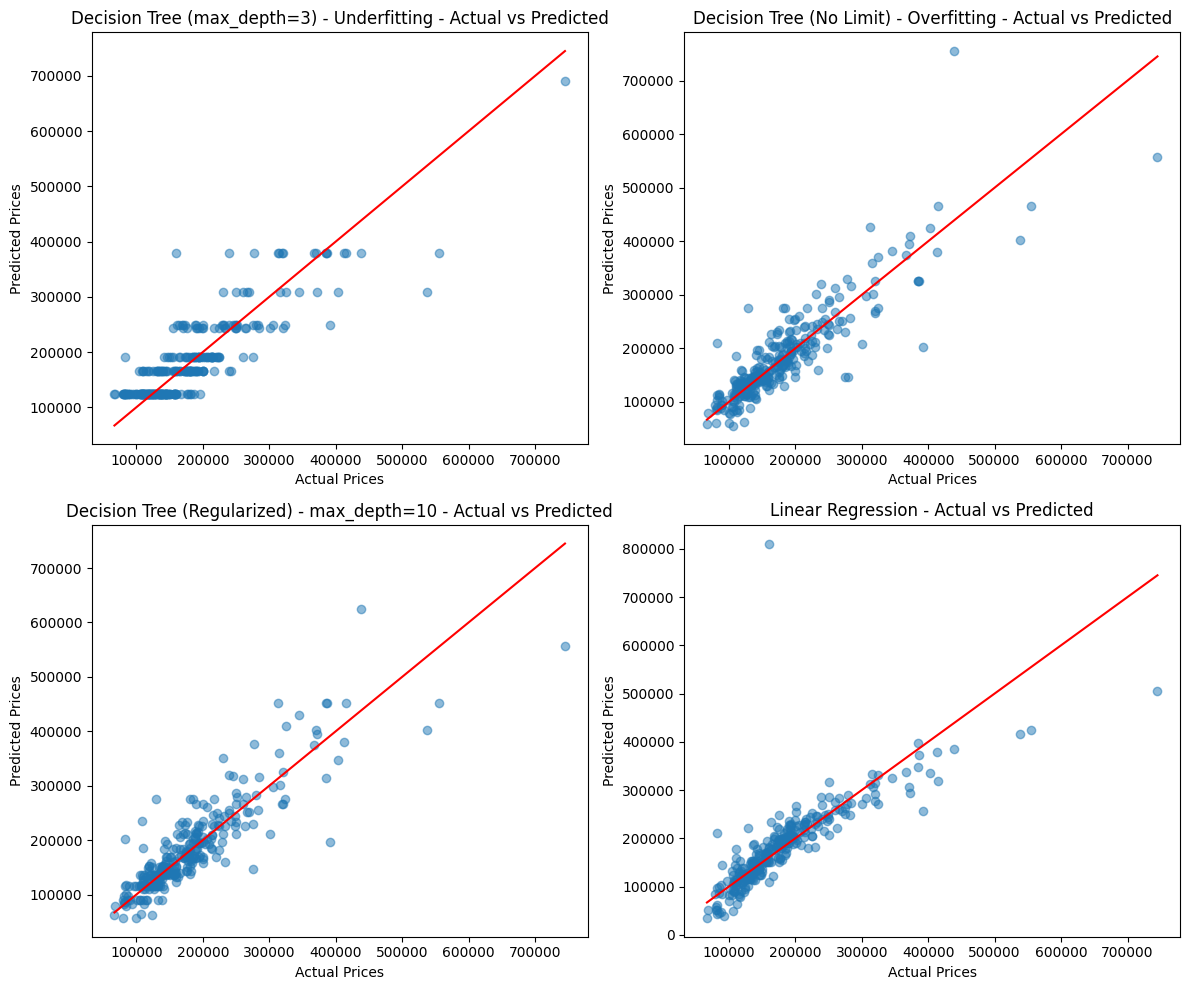

In [11]:
# Print a header to indicate the start of Step 3: Visualize Regression Model Predictions.
print("\n\n----- Step 3: Visualize Regression Model Predictions -----")

# Create a figure and a set of subplots using matplotlib.pyplot.subplots().
# We are creating a 2x2 grid of subplots (nrows=2, ncols=2) to display scatter plots for each of the 4 regression models.
# figsize=(12, 10) sets the size of the figure to be 12 inches wide and 10 inches tall.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the 2D array of axes (subplots) into a 1D array for easier indexing in the loop.
axes = axes.flatten() # Flatten the axes array for easier indexing

# Loop through each model in the 'regression_models' dictionary along with its index (i).
for i, (name, model) in enumerate(regression_models.items()):
    # Make predictions on the validation set.
    # For Linear Regression, use the imputed validation data (X_val_reg_imputed).
    # For other models (Decision Trees), use the original validation data (X_val_reg).
    if name == "Linear Regression":
        predictions = model.predict(X_val_reg_imputed) # Use imputed validation data for Linear Regression
    else:
         predictions = model.predict(X_val_reg) # Use original validation data for other models

    # Select the i-th subplot from the 'axes' array.
    ax = axes[i]

    # Create a scatter plot on the current subplot (ax).
    # Plot actual prices (y_val_reg) on the x-axis and predicted prices (predictions) on the y-axis.
    # alpha=0.5 makes the points semi-transparent, which is helpful for visualizing overlapping points.
    ax.scatter(y_val_reg, predictions, alpha=0.5)

    # Add a diagonal red line to the scatter plot to represent perfect predictions.
    # Points falling on this line indicate perfect alignment between actual and predicted values.
    ax.plot([min(y_val_reg), max(y_val_reg)], [min(y_val_reg), max(y_val_reg)], color='red') # Diagonal line

    # Set the label for the x-axis of the subplot.
    ax.set_xlabel("Actual Prices")

    # Set the label for the y-axis of the subplot.
    ax.set_ylabel("Predicted Prices")

    # Set the title of the subplot to include the model name, indicating which model's predictions are being visualized.
    ax.set_title(f"{name} - Actual vs Predicted")

# Use plt.tight_layout() to adjust subplot parameters to provide reasonable spacing between subplots.
# This helps prevent titles and labels from overlapping and makes the figure look cleaner.
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

# Display the entire figure with all the subplots using plt.show().
plt.show()

# Step 4: Prepare Data for Classification Task (Iris Flower Classification)
For our classification task, we will:

1. Load the Iris Dataset: We'll use scikit-learn's built-in Iris dataset.
2. Separate Features and Target: We'll identify the features (sepal and petal measurements) and the target variable (flower type).
3. Split Data: We'll divide the Iris data into training and validation sets, similar to what we did for the regression task.

In [13]:
# Print a header to indicate the start of Step 4: Prepare Data for Classification Task.
print("\n\n----- Step 4: Prepare Data for Classification Task -----")

# 4.1 Load the Iris dataset using datasets.load_iris() from scikit-learn.
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Create a pandas DataFrame from the Iris dataset's data and feature names for easier handling.
df_iris = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)

# Add the target variable (flower species) to the DataFrame.
# The target values are in iris_dataset.target, and we name the column 'target'.
df_iris['target'] = iris_dataset.target # 0: setosa, 1: versicolor, 2: virginica

# Print a message to confirm that the Iris dataset has been loaded successfully.
print("Iris dataset loaded successfully!")
print(df_iris['target'].value_counts())

# Display the first 5 rows of the Iris DataFrame using df_iris.head().
print("\nFirst 5 rows of the Iris dataset:")
print(df_iris.head())

# Print the first 5 rows of each Iris flower type
for flower_type in df_iris['target'].unique():
    print(f"\nFirst 5 rows of {iris_dataset.target_names[flower_type]}:")
    print(df_iris[df_iris['target'] == flower_type].head(5))

# 4.2 Separate features (X_classification) and target (y_classification) for the classification task.
# X_classification will contain all columns except 'target' (sepal and petal measurements).
X_classification = df_iris.drop('target', axis=1)
print("\nX_classification:")
print(X_classification.head())
print(X_classification.shape)
print(X_classification.info())

# y_classification will contain only the 'target' column (flower species labels).
y_classification = df_iris['target']
print("\ny_classification:")
print(y_classification.head())
print(y_classification.shape)
print(y_classification.info())
print(y_classification.value_counts())

# 4.3 Split the classification data into training and validation sets using train_test_split().
# We split X_classification and y_classification into training and validation sets.
# test_size=0.2 means 20% for validation, 80% for training.
# random_state=0 ensures reproducible splitting.
# stratify=y_classification is important for classification to maintain class proportions in both sets.
X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=0, stratify=y_classification) # Stratify for balanced class representation

# Print a message to confirm that the classification data has been split into training and validation sets.
print("\nClassification data split into training and validation sets (stratified).")

print("Shape of X_train_clf:", X_train_clf.shape)
print("Shape of X_val_clf:", X_val_clf.shape)
print("Shape of y_train_clf:", y_train_clf.shape)
print("Shape of y_val_clf:", y_val_clf.shape)



----- Step 4: Prepare Data for Classification Task -----
Iris dataset loaded successfully!
target
0    50
1    50
2    50
Name: count, dtype: int64

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

First 5 rows of setosa:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2     

In [14]:
# Print a header to indicate the start of Step 5: Classification Models - Training and Evaluation.
print("\n\n----- Step 5: Classification Models - Training and Evaluation -----")

# Define a dictionary 'classification_models' to store different classification models we want to evaluate.
# Each key is a descriptive name, and each value is the model object.
classification_models = {
    "Decision Tree (max_depth=2) - Underfitting": DecisionTreeClassifier(max_depth=2, random_state=0), # Decision Tree with max_depth=2 (simple, likely to underfit)
    "Decision Tree (No Limit)    - Overfitting ": DecisionTreeClassifier(random_state=0), # Decision Tree with no depth limit (complex, likely to overfit)
    "Decision Tree (Regularized) - max_depth=5 ": DecisionTreeClassifier(max_depth=5, random_state=0), # Decision Tree with max_depth=5 (regularized)
    "Logistic Regression                       ": LogisticRegression(random_state=0, max_iter=1000) # Logistic Regression (might underfit if Iris classes are not linearly separable)
}

# Initialize an empty dictionary 'classification_results' to store the evaluation metrics for each classification model.
classification_results = {}

# Loop through each model in the 'classification_models' dictionary.
for name, model in classification_models.items():
    # Train the current classification model using the training features (X_train_clf) and training target (y_train_clf).
    model.fit(X_train_clf, y_train_clf)

    # Make predictions on the validation features (X_val_clf) using the trained model.
    predictions_clf = model.predict(X_val_clf)

    # --- Add these lines for comparison ---
    print(f"\n--- {name} - True vs Predicted ---")
    comparison_df = pd.DataFrame({'True Labels': y_val_clf, 'Predicted Labels': predictions_clf})
    print(comparison_df)
    # ------------------------------------

    # Calculate the accuracy score by comparing the predicted classes to the actual validation target classes (y_val_clf).
    accuracy = accuracy_score(y_val_clf, predictions_clf)

    # Store various classification evaluation metrics in the 'classification_results' dictionary for the current model.
    classification_results[name] = {
        "Accuracy": accuracy, # Store accuracy score
        "Classification Report": classification_report(y_val_clf, predictions_clf, target_names=iris_dataset.target_names), # Store classification report
        "Confusion Matrix": confusion_matrix(y_val_clf, predictions_clf) # Store confusion matrix
    }

    # Print the model name and its corresponding accuracy score.
    print(f"Model: {name}, Accuracy: {accuracy:.2f}")

# Print a header to display the classification model performance summary based on accuracy.
print("\n--- Classification Model Performance (Accuracy) ---")

# Create a pandas DataFrame to display the accuracy scores of all classification models in a table.
df_classification_accuracy = pd.DataFrame.from_dict(classification_results, orient='index', columns=['Accuracy'])

# Print the DataFrame containing the accuracy scores table.
print(df_classification_accuracy[['Accuracy']]) # Display only Accuracy in the table

# Print a header to indicate the display of detailed classification reports.
print("\n--- Classification Reports ---")

# Loop through the 'classification_results' dictionary to print the classification report for each model.
for name, results in classification_results.items():
    # Print the model name as a header for each classification report.
    print(f"\n--- {name} Classification Report ---")
    # Print the classification report stored in the 'results' dictionary for the current model.
    print(results["Classification Report"])



----- Step 5: Classification Models - Training and Evaluation -----

--- Decision Tree (max_depth=2) - Underfitting - True vs Predicted ---
     True Labels  Predicted Labels
36             0                 0
55             1                 1
44             0                 0
134            2                 1
39             0                 0
90             1                 1
147            2                 2
47             0                 0
3              0                 0
81             1                 1
136            2                 2
88             1                 1
54             1                 1
139            2                 2
67             1                 1
142            2                 2
113            2                 2
65             1                 1
50             1                 1
46             0                 0
19             0                 0
121            2                 2
103            2                 2
129            2  



----- Step 6: Visualize Classification Model Performance - Confusion Matrices -----


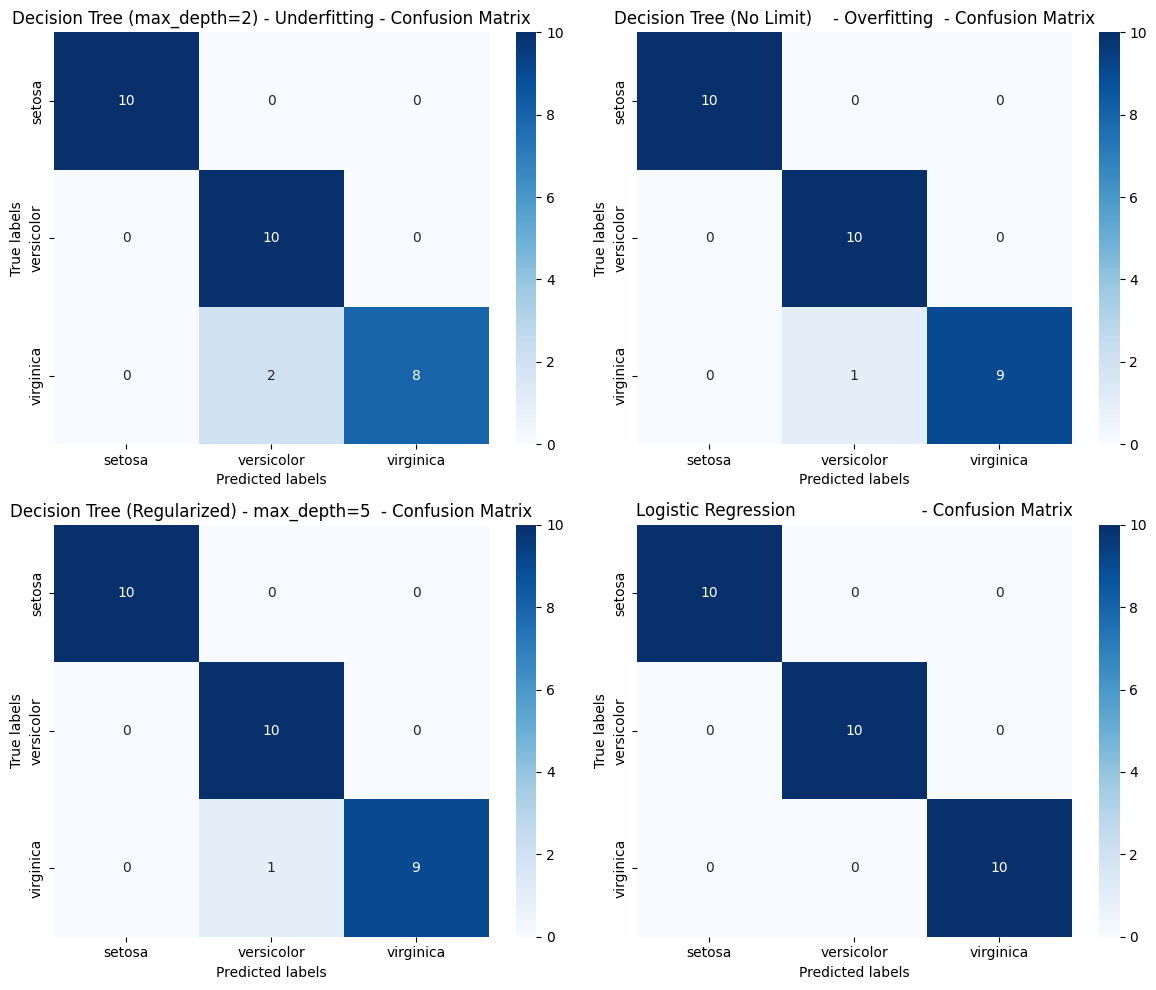

In [15]:
# Print a header to indicate the start of Step 6: Visualize Classification Model Performance - Confusion Matrices.
print("\n\n----- Step 6: Visualize Classification Model Performance - Confusion Matrices -----")

# Create a figure and a set of subplots for displaying confusion matrices.
# We are creating a 2x2 grid of subplots for the 4 classification models.
# figsize=(12, 10) sets the size of the figure.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the 2D array of axes into a 1D array for easier indexing.
axes = axes.flatten()

# Loop through each model's results in the 'classification_results' dictionary along with its index (i).
for i, (name, results) in enumerate(classification_results.items()):
    # Get the confusion matrix from the 'results' dictionary for the current model.
    cm = results["Confusion Matrix"]

    # Select the i-th subplot from the 'axes' array.
    ax = axes[i]

    # Use seaborn's heatmap function to visualize the confusion matrix on the current subplot (ax).
    # cm: The confusion matrix data.
    # annot=True: Display numerical values in each cell of the heatmap.
    # fmt="d": Format the annotations as integers.
    # cmap="Blues": Use the 'Blues' color map for the heatmap.
    # ax=ax: Plot on the current subplot 'ax'.
    # xticklabels=iris_dataset.target_names: Set x-axis tick labels to Iris flower names.
    # yticklabels=iris_dataset.target_names: Set y-axis tick labels to Iris flower names.
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax,
                xticklabels=iris_dataset.target_names,
                yticklabels=iris_dataset.target_names)

    # Set the label for the x-axis of the subplot to 'Predicted labels'.
    ax.set_xlabel('Predicted labels')

    # Set the label for the y-axis of the subplot to 'True labels'.
    ax.set_ylabel('True labels')

    # Set the title of the subplot to include the model name and 'Confusion Matrix'.
    ax.set_title(f'{name} - Confusion Matrix')

# Adjust subplot parameters for a tight layout to prevent overlapping elements.
plt.tight_layout()

# Display the entire figure with all confusion matrix heatmaps.
plt.show()



----- Step 7: Visualize Classification Model Performance - ROC Curves -----


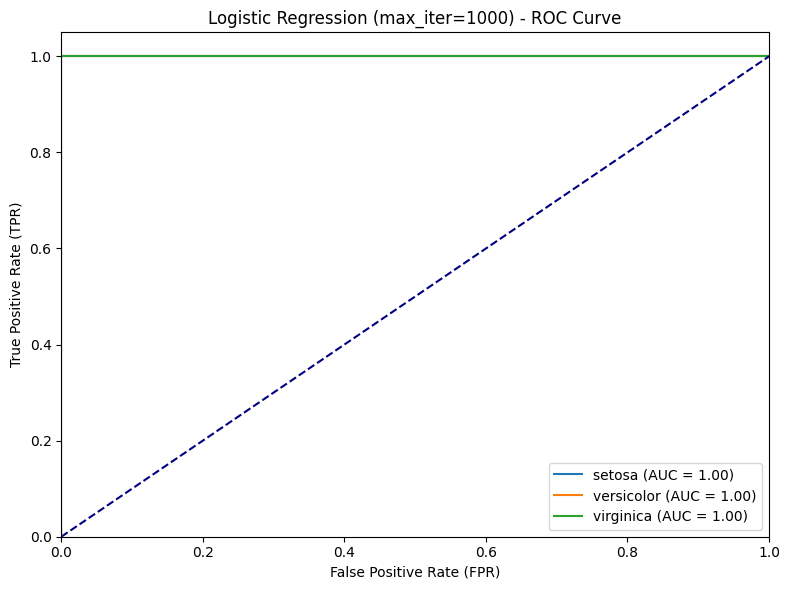

In [16]:
# Print a header to indicate the start of Step 7: Visualize Classification Model Performance - ROC Curves.
print("\n\n----- Step 7: Visualize Classification Model Performance - ROC Curves -----")

# Define the probabilistic_models dictionary here
probabilistic_models = {
    "Logistic Regression (max_iter=1000)": LogisticRegression(max_iter=1000, random_state=0), # Example probabilistic model
    # Add other models that output probabilities here
}

# Fit the models before looping
for name, model in probabilistic_models.items():
    # Assuming you have X_train_clf and y_train_clf from previous cells
    model.fit(X_train_clf, y_train_clf)  # Fit the model here

# Get the number of probabilistic models to create subplots.
n_models = len(probabilistic_models)

# Create a figure and a set of subplots for displaying ROC curves.
# We are creating separate subplots for each probabilistic model.
# figsize=(12, 6) sets the size of the figure.
fig, axes = plt.subplots(nrows=1, ncols=n_models, figsize=(8, 6))

# Flatten the axes array if there's only one model to avoid indexing errors.
if n_models == 1:
    axes = [axes]

# Loop through each probabilistic model in the 'probabilistic_models' dictionary along with its index (i).
for i, (name, model) in enumerate(probabilistic_models.items()):
    # Get predicted probabilities for each class for the validation set using model.predict_proba(X_val_clf).
    y_prob = model.predict_proba(X_val_clf)

    # Get the number of classes in the Iris dataset.
    n_classes = len(iris_dataset.target_names)

    # Select the current subplot from the 'axes' array.
    ax = axes[i]

    # Loop through each class to create a one-vs-rest ROC curve for the current model.
    for class_index in range(n_classes):
        # Get the true binary labels for the current class.
        y_val_binary = (y_val_clf == class_index).astype(int)

        # Get the predicted probabilities for the current class.
        y_score = y_prob[:, class_index]

        # Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve.
        fpr, tpr, thresholds = roc_curve(y_val_binary, y_score)

        # Calculate the Area Under the ROC Curve (AUC).
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve for the current class on the current subplot.
        ax.plot(fpr, tpr, label=f'{iris_dataset.target_names[class_index]} (AUC = {roc_auc:.2f})')

    # Plot a diagonal line (random classifier line) in navy color and dashed style.
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')

    # Set the x-axis limits and label.
    ax.set_xlim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate (FPR)')

    # Set the y-axis limits and label.
    ax.set_ylim([0.0, 1.05])
    ax.set_ylabel('True Positive Rate (TPR)')

    # Set the title of the subplot to include the model name.
    ax.set_title(f'{name} - ROC Curve')

    # Enable the legend to display labels for each ROC curve in the current subplot.
    ax.legend(loc="lower right")

# Adjust subplot parameters for a tight layout to prevent overlapping elements.
plt.tight_layout()

# Display the entire figure with all ROC curves in separate subplots.
plt.show()

# Step 8: Regularization Exercises - Adjusting min_samples_split and max_leaf_nodes

**Exercises in this section:**

1. Regression - min_samples_split Experiment:

  * Create Decision Tree Regressor models with different values of min_samples_split and observe the impact on validation MAE.
  * Visualize predictions using scatter plots.

2. Regression - max_leaf_nodes Experiment:

  * Create Decision Tree Regressor models with different values of max_leaf_nodes and observe the impact on validation MAE.
  * Visualize predictions using scatter plots.
3. Classification - min_samples_split Experiment:

  * Create Decision Tree Classifier models with different values of min_samples_split and observe the impact on validation Accuracy, Classification Report, and Confusion Matrix.
  * Visualize Confusion Matrices.
4. Classification - max_leaf_nodes Experiment:

  * Create Decision Tree Classifier models with different values of max_leaf_nodes and observe the impact on validation Accuracy, Classification Report, and Confusion Matrix.
  * Visualize Confusion Matrices.